In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Example - Digits Recognition

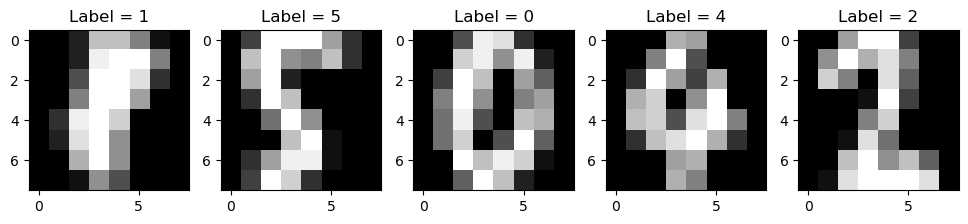

In [2]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

fig, axes = plt.subplots(ncols=5, figsize=(12, 4))
samples = np.random.randint(0, len(X), 5)
for i, s in enumerate(samples):
    plt.sca(axes[i])
    digit = X[s].reshape((8, 8))
    plt.imshow(digit, cmap='gray')
    plt.title(f'Label = {y[s]}')

plt.show()

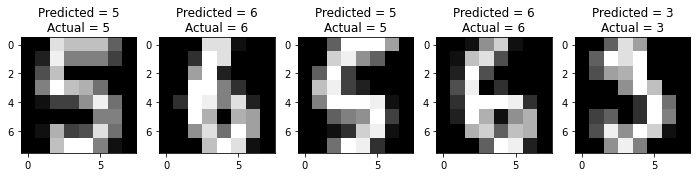

In [3]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear'))
])

model.fit(X, y)

y_pred = model.predict(X)

samples_pred = np.random.randint(0, len(y_pred), 5)
for i, s in enumerate(samples_pred):
    plt.sca(axes[i])
    digit = X[s].reshape((8, 8))
    plt.imshow(digit, cmap='gray')
    plt.title(f'Predicted = {y_pred[s]}\nActual = {y[s]}')

plt.show()

# Numpy Rview

- NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

- You can install numpy package by running `!pip install numpy` in a cell.

- Can be imported like this: `import numpy as np`

*Numpy arrays (ndarrys)*

- An N-dimensional array
- Collection of items *of the same type*
- Zero-based indexing

### 1. Creating Numpy Arrays

In [4]:
import numpy as np

# different method of creating numpy arrays

a = np.array([1, 2, 3, 4], dtype='int')
b = np.arange(1, 10)
c = np.zeros((3, 4), dtype='bool')
d = np.linspace(0, 2, 10, dtype='float16')
f = np.linspace(0, 2, 11, dtype='float16')

In [5]:
for x in [a, b, c, d, f]:
    print(x)
    print('--------------')

[1 2 3 4]
--------------
[1 2 3 4 5 6 7 8 9]
--------------
[[False False False False]
 [False False False False]
 [False False False False]]
--------------
[0.     0.2222 0.4443 0.6665 0.8887 1.111  1.333  1.556  1.777  2.    ]
--------------
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
--------------


In [7]:
print(c.shape)
print(c.size)

(3, 4)
12


### 2. The Magical Broadcasting

In [7]:
x = np.arange(1, 5)
print(f'x: {x}')

y = x + 5
print(f'y: {y}')

z = x * 2
print(f'z: {z}')

w = y - z
print(f'w: {w}')

x: [1 2 3 4]
y: [6 7 8 9]
z: [2 4 6 8]
w: [4 3 2 1]


In [23]:
x = np.arange(12).reshape((3, 4))
y = np.array([[1, 0, 1]]).T

print(x)
print(y)

print(x * y)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[1]
 [0]
 [1]]
[[ 0  1  2  3]
 [ 0  0  0  0]
 [ 8  9 10 11]]


In [22]:
x = np.array([[0, 1, 2]])
y = x.T

print(x)
print(y)

print(x + y)

[[0 1 2]]
[[0]
 [1]
 [2]]


### 3. Selecting, Indexing Arrays

In [10]:
a = np.linspace(0, 5, 11)
print(f'a: {a}')

print(a[3])
print(a[4:6])
print(a[-2:])
print(a[:3])

a: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
1.5
[2.  2.5]
[4.5 5. ]
[0.  0.5 1. ]


In [11]:
b = np.arange(12).reshape((3, 4))
print(b)

print(b[0, 2])
print(b[-1, -1])
print(b[0:2, 3])
print(b[2:, 2:])
print(b[0:3:2, 0])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
2
11
[3 7]
[[10 11]]
[0 8]


### Some Basic Numpy Operations

In [12]:
a = np.array([1, 2, 3, 4])
b = np.array([2, 4, 6, 8])

print(a.dot(b))
print(a.sum())
print(b.max())
print(a.argmin())
print(b.mean())
print(a.std())

60
10
8
0
5.0
1.118033988749895


***Numpy is HUGE!! These are just the basics!***

# Pandas Review

- Pandas is an open-source Python Library providing high-performance data manipulation and analysis tool using its powerful data structures. The name Pandas is derived from the word Panel Data – an Econometrics from Multidimensional data.

- installation: `!pip install pandas`

- import with: `import pandas as pd`

### 1. Creating A DataFrame In Pandas

In [13]:
import pandas as pd

df = pd.DataFrame({
    'name': ['taghi', 'ali', 'nasrin'],
    'weight': [100, 67, 85],
    'height': [1.95, 1.80, 1.65]
})

df.head() # <-- Notice the index values

,name,weight,height
0,taghi,100,1.95
1,ali,67,1.80
2,nasrin,85,1.65


In [14]:
df = df.set_index('name')
df.head()

,weight,height
name,,
taghi,100,1.95
ali,67,1.80
nasrin,85,1.65


### 2. Accessing Values Within The DataFrame

using `.loc` and `.iloc`

In [15]:
df.loc['ali']

weight    67.0
height     1.8
Name: ali, dtype: float64

In [16]:
df.loc[['ali', 'nasrin'], 'weight']

name
ali       67
nasrin    85
Name: weight, dtype: int64

In [17]:
df.iloc[:2]

,weight,height
name,,
taghi,100,1.95
ali,67,1.80


In [18]:
df.loc[(df.weight <= 90)]

,weight,height
name,,
ali,67,1.80
nasrin,85,1.65


In [19]:
df.loc[(df.weight <= 90) & (df.height >= 1.75)]

,weight,height
name,,
ali,67,1.8


### 3. Operation On DataFrames

In [20]:
# adding a new column
df['bmi'] = df['weight'] / (df['height']**2)
df.head()

,weight,height,bmi
name,,,
taghi,100,1.95,26.298488
ali,67,1.80,20.679012
nasrin,85,1.65,31.221304


In [21]:
df['healty_bmi'] = (df['bmi'] <= 25) & (df['bmi'] >= 19)
df.head()

,weight,height,bmi,healty_bmi
name,,,,
taghi,100,1.95,26.298488,False
ali,67,1.80,20.679012,True
nasrin,85,1.65,31.221304,False


In [22]:
### 4. Reading FROM File & Basic Stats

In [23]:
df = pd.read_csv('adult.csv')

df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
33573,19,Private,319889,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K
2141,52,Self-emp-not-inc,95082,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
45780,36,Private,188972,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2861,25,Private,54298,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,30,United-States,<=50K
48003,58,Private,192806,7th-8th,4,Never-married,Handlers-cleaners,Not-in-family,White,Female,0,0,33,United-States,<=50K


In [24]:
df.mean()

C:\Users\rabol\AppData\Local\Temp/ipykernel_9228/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age                    38.643585
fnlwgt             189664.134597
educational-num        10.078089
capital-gain         1079.067626
capital-loss           87.502314
hours-per-week         40.422382
dtype: float64

In [25]:
df.loc[(df.age <= 45)].mean()

C:\Users\rabol\AppData\Local\Temp/ipykernel_9228/3890761195.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc[(df.age <= 45)].mean()


age                    31.406117
fnlwgt             194153.626042
educational-num        10.122719
capital-gain          765.496997
capital-loss           77.531693
hours-per-week         40.393113
dtype: float64

In [26]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

# Matplotlib Review

- Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays.

- installation: `!pip install matplotlib`

- import the package using `import matplotlib.pyplot as plt`

### 1. Line Plot

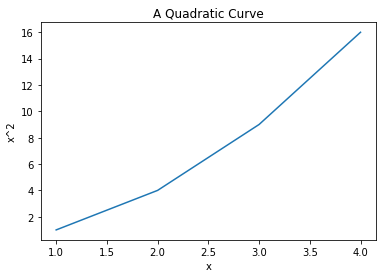

In [27]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('x^2')
plt.title('A Quadratic Curve')
plt.show()

### 2. Multi-Line Plot

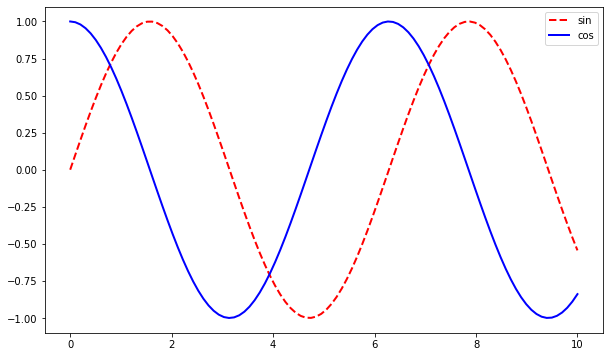

In [28]:
import numpy as np

plt.figure(figsize=(10, 6))
x = np.linspace(0, 10, 100)
y = np.sin(x)
z = np.cos(x)
plt.plot(x, y, linewidth=2, c='red', linestyle='--')
plt.plot(x, z, linewidth=2, c='blue', linestyle='-')
plt.legend(['sin', 'cos'])
plt.show()

### 3. Bar Plot

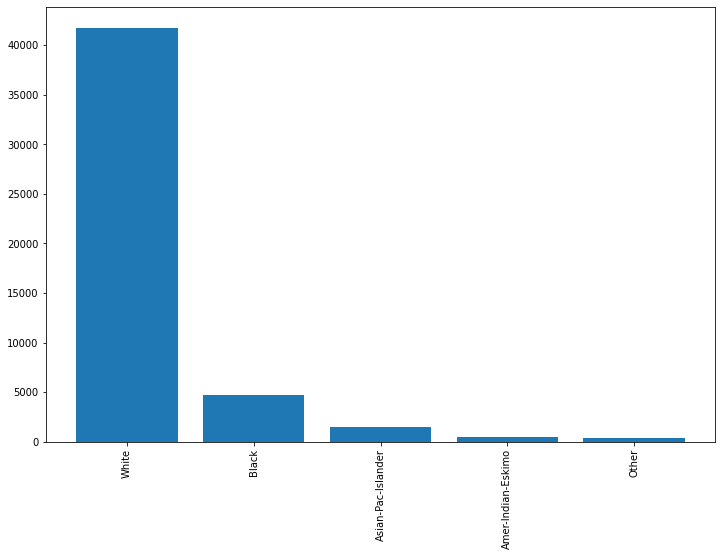

In [29]:
import pandas as pd
df = pd.read_csv('adult.csv')
counts = df['race'].value_counts()

plt.figure(figsize=(12, 8))
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.show()

### 4. Scatter Plot

In [30]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


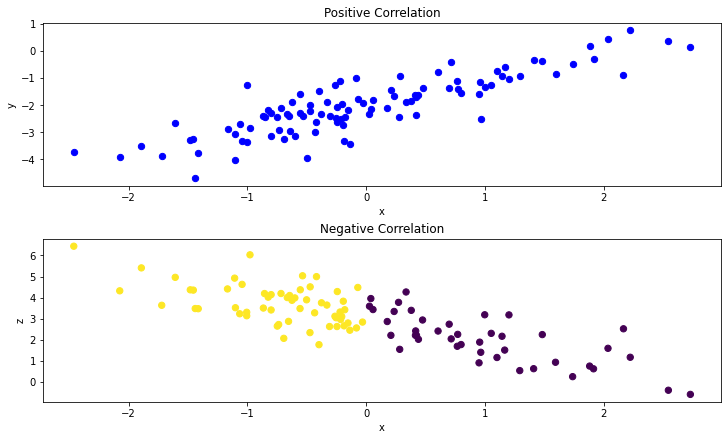

In [31]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 6), constrained_layout=True)

x = np.random.normal(0, 1, size=100)
y = x + np.random.normal(-2, 0.5, size=100)
z = np.random.normal(3, 0.8, size=100) - x

plt.sca(axes[0])
plt.scatter(x, y, s=40, c='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Positive Correlation')


plt.sca(axes[1])
plt.scatter(x, z, s=40, c=x<0)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Negative Correlation')

plt.show()